<a href="https://colab.research.google.com/github/jazzathoth/DS-Unit-2-Sprint-2-Regression/blob/master/module2-polynomial-log-linear-regression/polynomial-log-linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intermediate Linear Regression Practice

## Use a Linear Regression model to get the lowest RMSE possible on the following dataset:

[Dataset Folder](https://github.com/ryanleeallred/datasets/tree/master/Ames%20Housing%20Data)

[Raw CSV](https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv)

## Your model must include (at least):
- A log-transformed y variable
- Two polynomial features
- One interaction feature
- 10 other engineered features

What is the lowest Root-Mean-Squared Error that you are able to obtain? Share your best RMSEs in Slack!

Notes:

There may be some data cleaning that you need to do on some features of this dataset. Linear Regression will only accept numeric values and will not accept

Note* There may not be a clear candidate for an interaction term in this dataset. Include one anyway, sometimes it's a good practice for predictive modeling feature engineering in general. 

In [0]:
%matplotlib inline
from ipywidgets import interact
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



In [0]:
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')
df.head()

In [0]:
print(df.shape, '\n\n', df.isnull().sum())

In [0]:
null_col = df.loc[:, df.isnull().sum() > 0].columns.tolist()

In [24]:
print(np.array(null_col), '\n\n', len(null_col))

['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature'] 

 19


In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [19]:
dfd = df.drop(null_col, axis=1)
dfd = dfd.drop('Id', axis=1)
print(dfd.columns, '\n\n', dfd.shape)

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'SalePrice'],
      dtype='object') 

 (1460, 61)


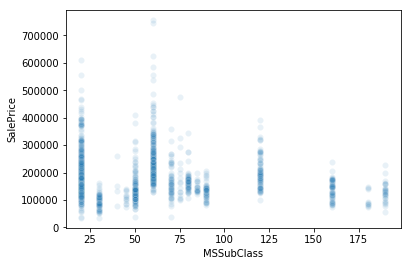

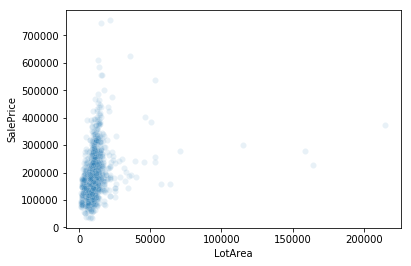

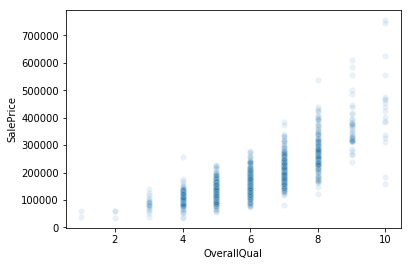

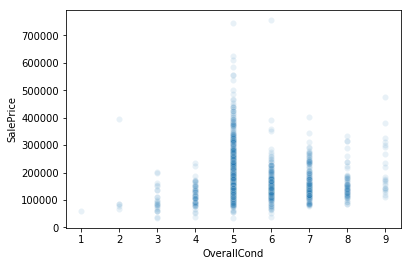

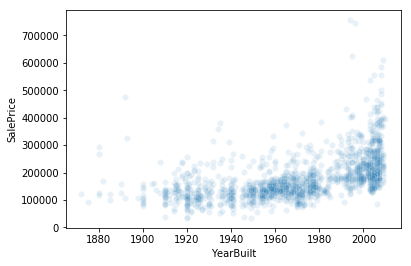

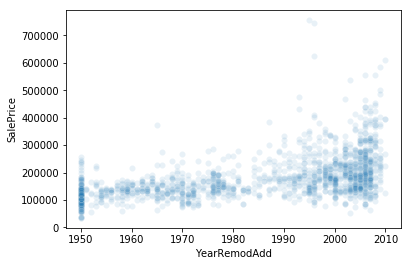

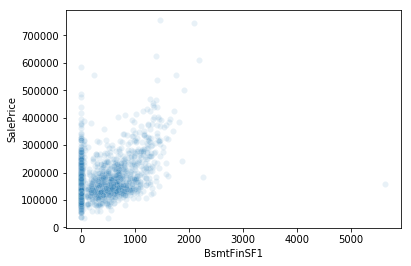

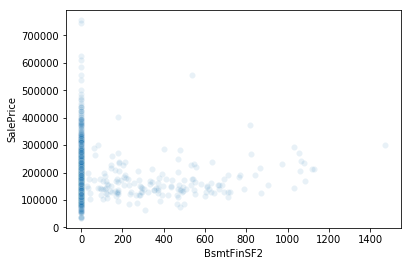

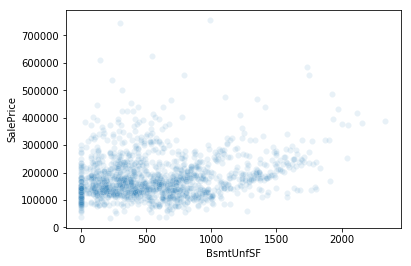

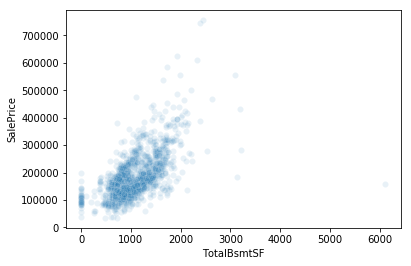

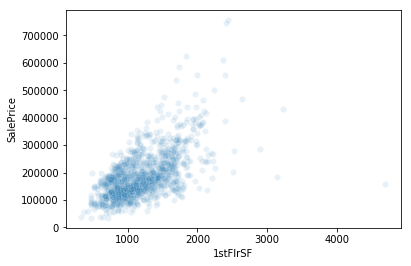

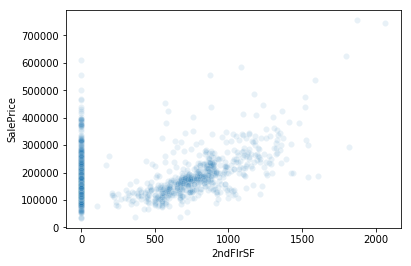

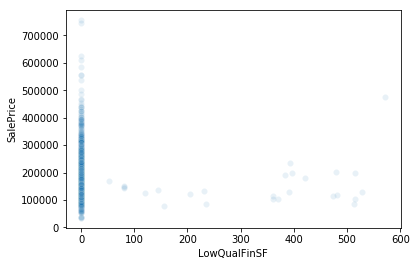

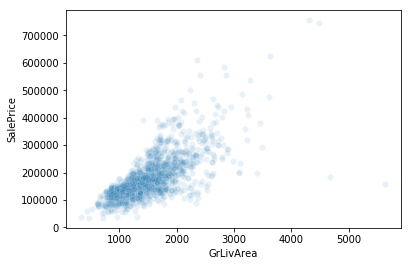

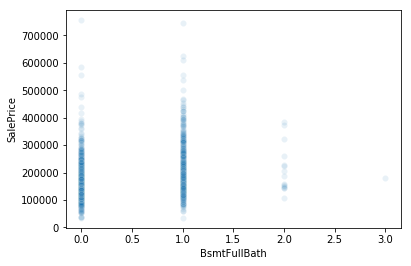

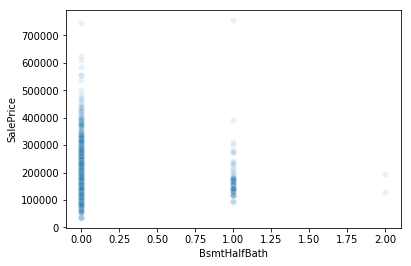

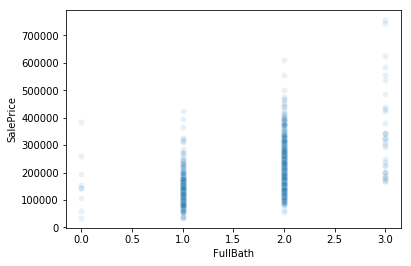

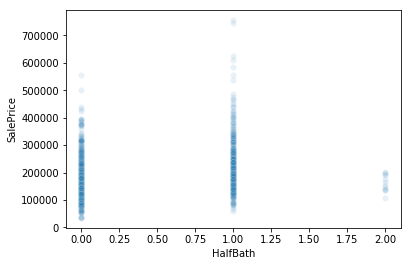

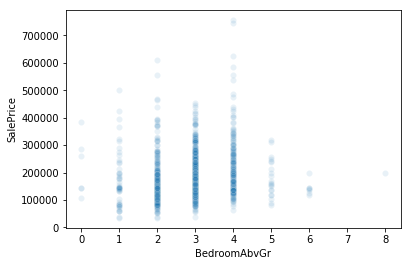

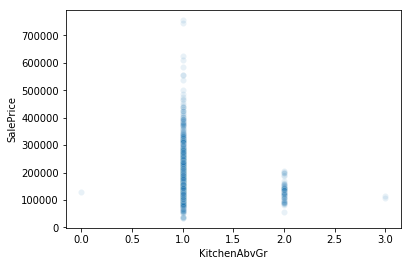

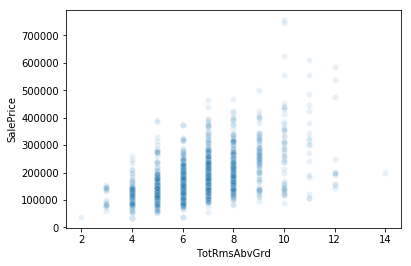

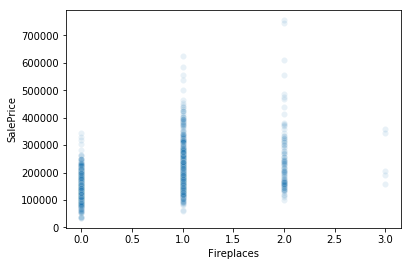

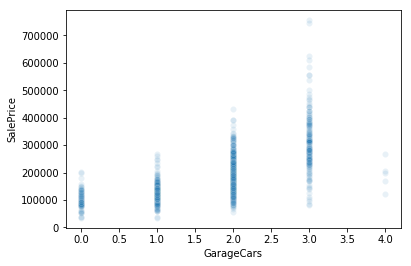

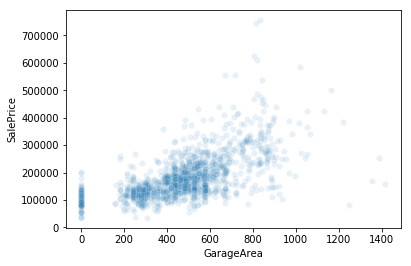

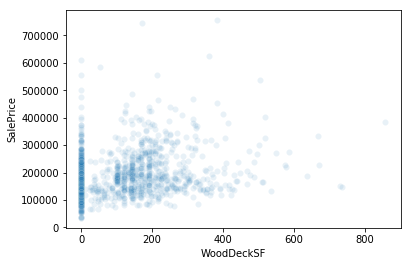

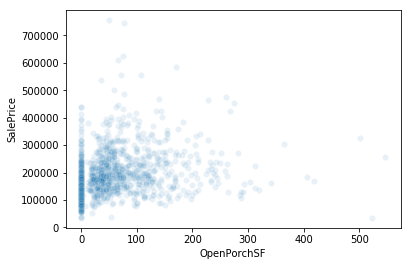

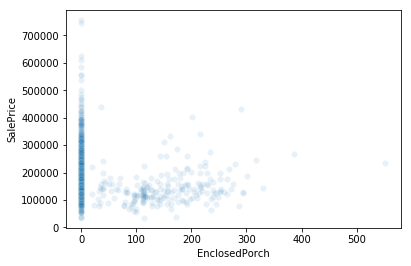

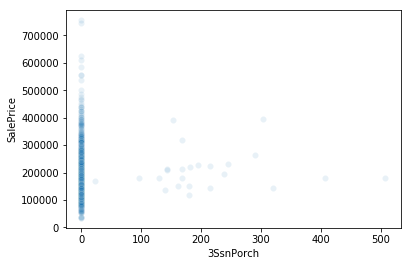

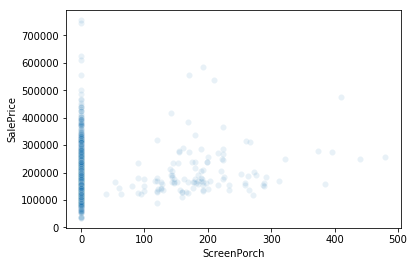

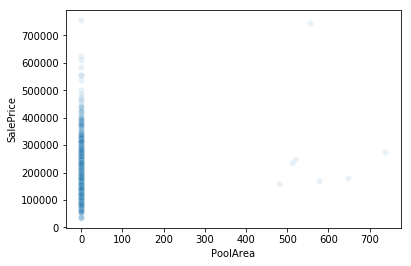

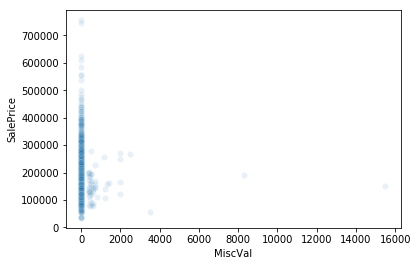

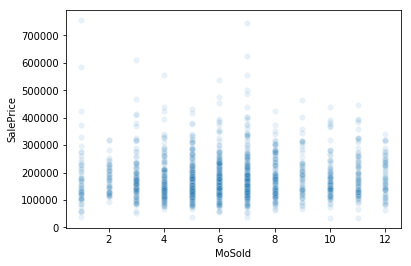

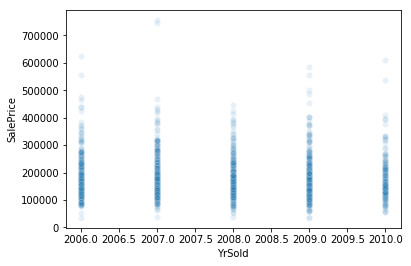

In [26]:
target = 'SalePrice'
num_col = dfd.select_dtypes(include='number').columns
for f in num_col.drop(target):
  sns.scatterplot(x=f, y=target, data=dfd, alpha=.1)
  plt.show()

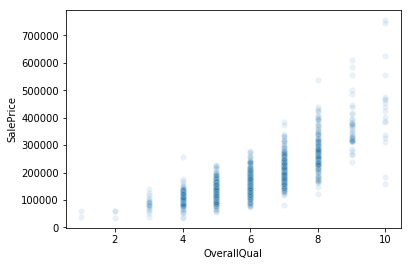

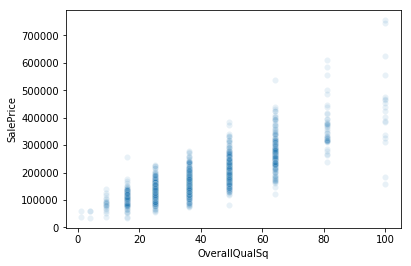

In [28]:
dfd['OverallQualSq'] = dfd['OverallQual']**2
for f in ['OverallQual','OverallQualSq']:
  sns.scatterplot(x=f, y=target, data=dfd, alpha=.1)
  plt.show()

In [61]:
target = 'SalePrice'
features = ['OverallQual']

y = dfd[target]
x = dfd[features]

def model_linear(X, Y):
  xtrain, xtest, ytrain, ytest = train_test_split(X, Y, 
                                                  train_size=.80, 
                                                  test_size=.20, 
                                                  random_state=42)
  
  mlin = LinearRegression()
  mlin.fit(xtrain, ytrain)
  
  ypred = mlin.predict(xtest)
  
  rmse = (mean_squared_error(ytest, ypred))**.5
  r2 = r2_score(ytest, ypred)
  b = mlin.intercept_
  m = pd.Series(mlin.coef_, xtrain.columns)
  
  print('RMS Error: {}\n'.format(rmse))
  print('r^2 score: {}\n'.format(r2))
  print('Intercept (B): {}'.format(b))
  print(m.to_string())
  
model_linear(x,y)

RMS Error: 51778.62651238531

r^2 score: 0.6504677778896863

Intercept (B): -90233.22290028064
OverallQual    44379.877671


In [62]:
model_linear(dfd[['OverallQualSq']],y)

RMS Error: 47889.17817113345

r^2 score: 0.7010070596792005

Intercept (B): 39264.778410326835
OverallQualSq    3613.824421


In [63]:
model_linear(dfd[['OverallQual','OverallQualSq']],y)

RMS Error: 46635.77592570267

r^2 score: 0.7164533114439823

Intercept (B): 144664.1708952135
OverallQual     -34522.105042
OverallQualSq     6306.341845


In [0]:
dfd['LogSP'] = np.log10(dfd['SalePrice'])

In [0]:
target = 'LogSP'
features = ['OverallQual']

y = dfd[target]
x = dfd[features]

In [66]:
model_linear(x,y)

RMS Error: 0.1003633327070522

r^2 score: 0.7138205628839374

Intercept (B): 4.611357657402228
OverallQual    0.100217


In [0]:
dfd['lnSP'] = np.log(dfd['SalePrice'])

target = 'lnSP'
features = ['OverallQual']

y = dfd[target]
x = dfd[features]

In [68]:
model_linear(x,y)

RMS Error: 0.23109511377446032

r^2 score: 0.7138205628839367

Intercept (B): 10.618043400398314
OverallQual    0.230759


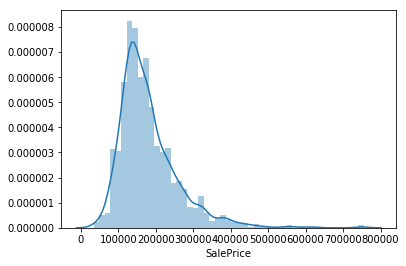

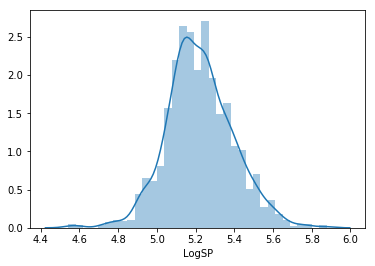

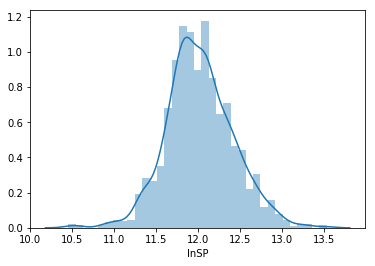

In [69]:
for f in ['SalePrice', 'LogSP', 'lnSP']:
  sns.distplot(dfd[f])
  plt.show()


In [0]:
target = 'lnSP'
features = num_col.drop(['SalePrice'])

y = dfd[target]
x = dfd[features]

In [84]:
model_linear(x,y)

RMS Error: 0.14959113770530913

r^2 score: 0.880086348030571

Intercept (B): 14.298524824063085
MSSubClass      -0.000666
LotArea          0.000002
OverallQual      0.084723
OverallCond      0.045090
YearBuilt        0.002746
YearRemodAdd     0.001248
BsmtFinSF1       0.000020
BsmtFinSF2       0.000007
BsmtUnfSF        0.000005
TotalBsmtSF      0.000032
1stFlrSF         0.000046
2ndFlrSF         0.000023
LowQualFinSF     0.000073
GrLivArea        0.000142
BsmtFullBath     0.073888
BsmtHalfBath     0.017913
FullBath         0.033622
HalfBath         0.021578
BedroomAbvGr     0.000963
KitchenAbvGr    -0.050119
TotRmsAbvGrd     0.014038
Fireplaces       0.049744
GarageCars       0.076836
GarageArea       0.000018
WoodDeckSF       0.000126
OpenPorchSF     -0.000038
EnclosedPorch    0.000152
3SsnPorch        0.000281
ScreenPorch      0.000334
PoolArea        -0.000429
MiscVal         -0.000002
MoSold           0.000390
YrSold          -0.005762


In [0]:
dfd['FinishedSF'] = dfd['1stFlrSF'] + dfd['2ndFlrSF'] + dfd['BsmtFinSF1'] + dfd['BsmtFinSF2']
dfd['UnFinSF'] = dfd['BsmtUnfSF'] + dfd['LowQualFinSF']

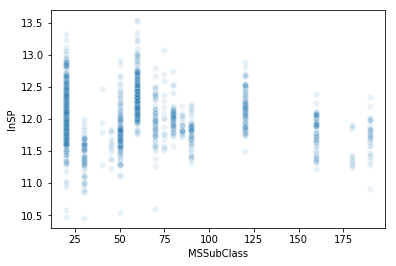

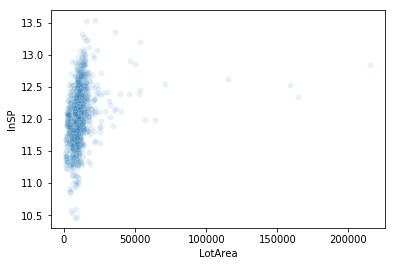

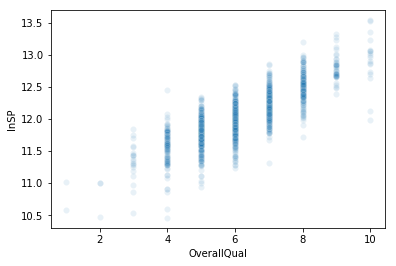

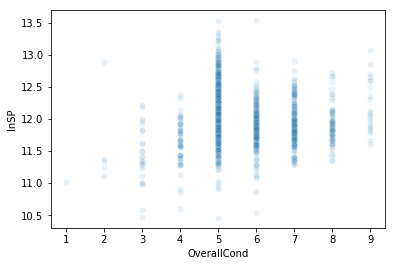

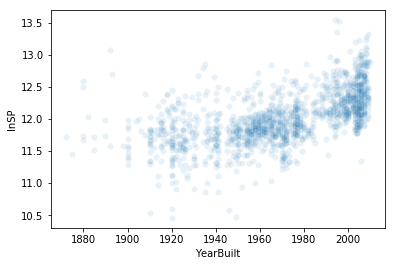

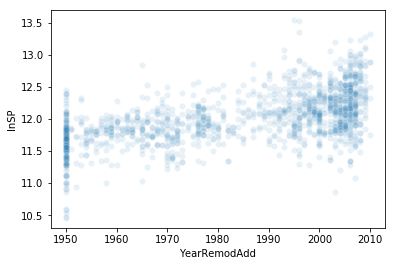

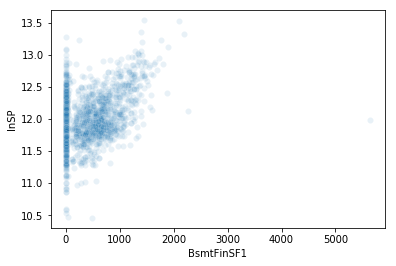

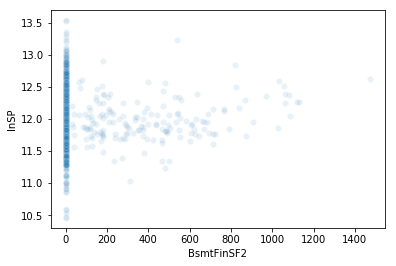

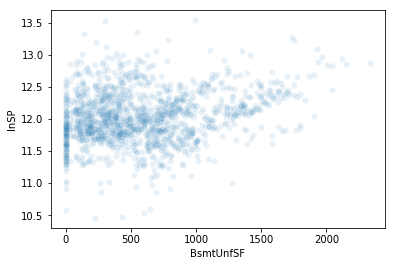

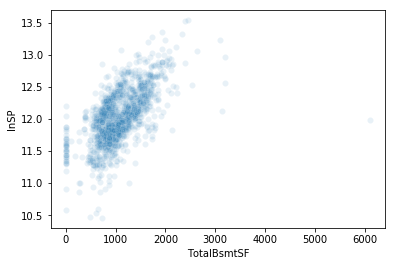

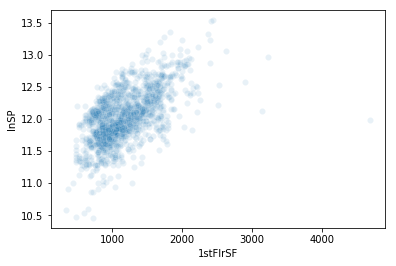

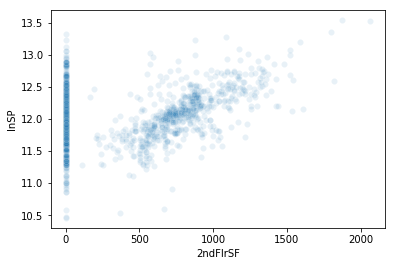

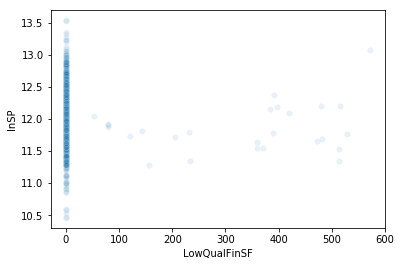

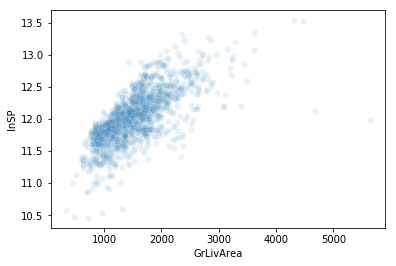

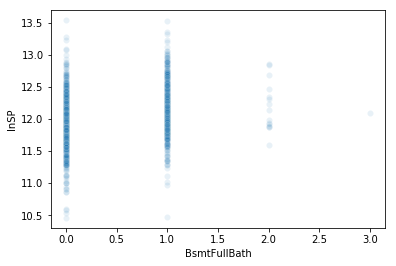

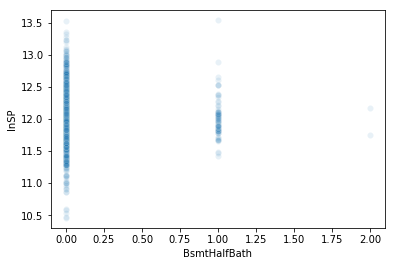

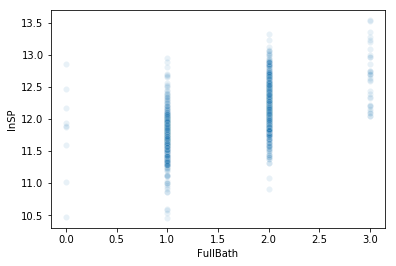

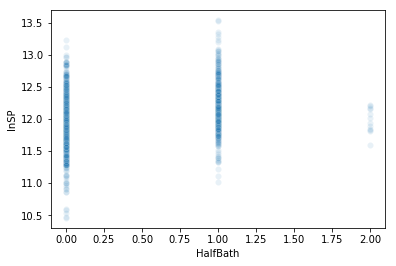

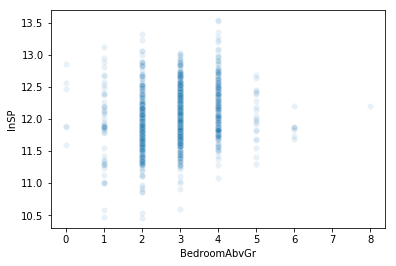

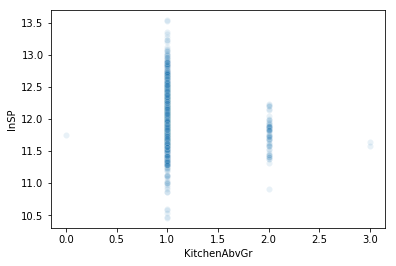

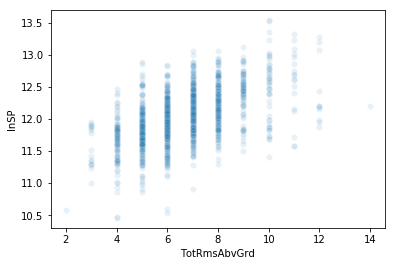

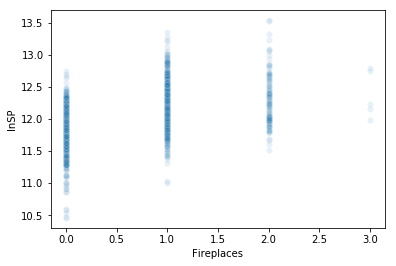

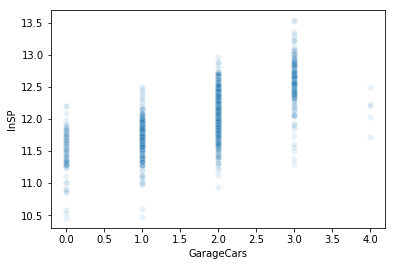

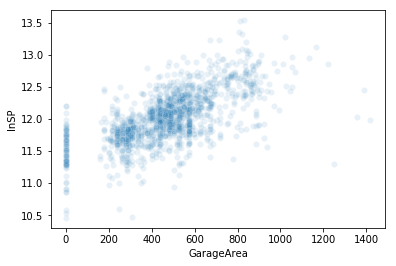

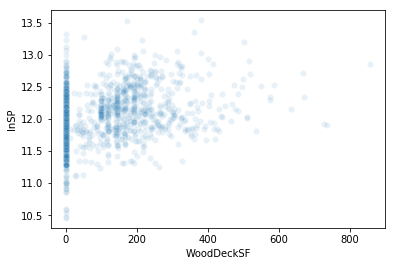

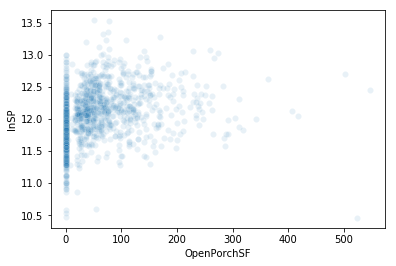

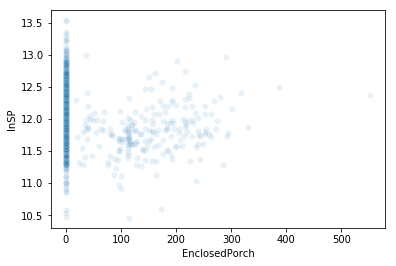

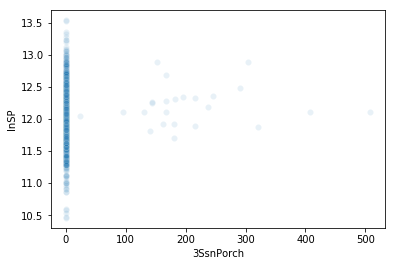

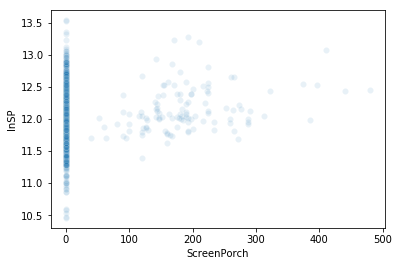

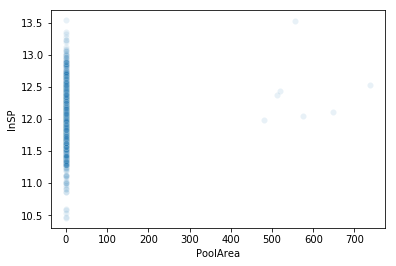

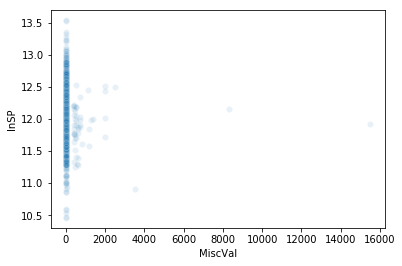

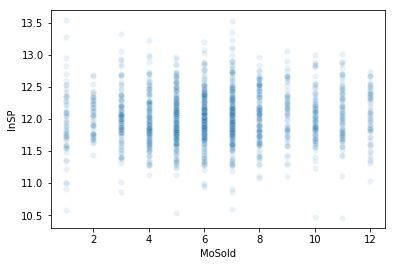

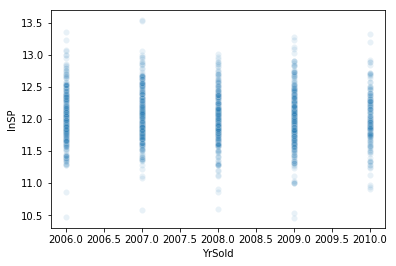

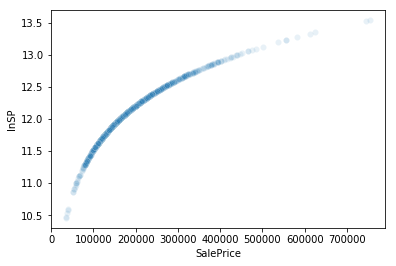

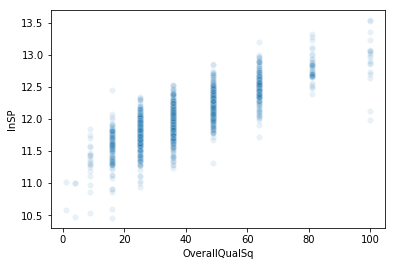

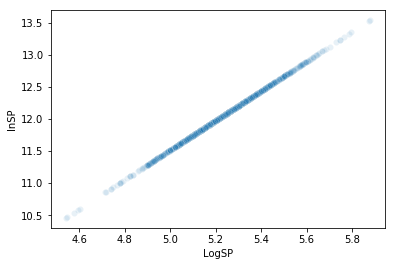

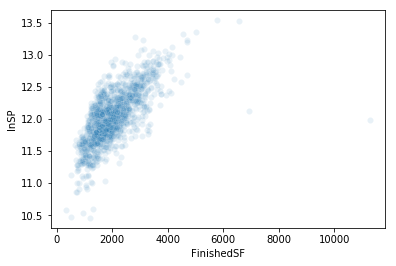

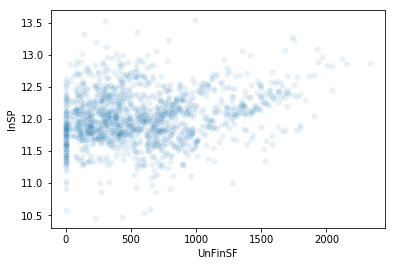

In [86]:
num_col2 = dfd.select_dtypes(include='number').columns
for f in num_col2.drop(target):
  sns.scatterplot(x=f, y=target, data=dfd, alpha=.1)
  plt.show()

In [0]:
target = 'lnSP'
features = num_col2.drop(['SalePrice', target,
                          'LogSP', '1stFlrSF',
                          '2ndFlrSF', 'BsmtFinSF1',
                          'BsmtFinSF2', 'BsmtUnfSF',
                          'LowQualFinSF'])

y = dfd[target]
x = dfd[features]

In [90]:
model_linear(x,y)

RMS Error: 0.14962718488021373

r^2 score: 0.8800285495639316

Intercept (B): 14.656893596056726
MSSubClass      -0.000672
LotArea          0.000002
OverallQual      0.058008
OverallCond      0.046212
YearBuilt        0.002790
YearRemodAdd     0.001236
TotalBsmtSF     -0.000002
GrLivArea        0.000112
BsmtFullBath     0.075235
BsmtHalfBath     0.019050
FullBath         0.032580
HalfBath         0.017410
BedroomAbvGr     0.002211
KitchenAbvGr    -0.048151
TotRmsAbvGrd     0.013500
Fireplaces       0.051391
GarageCars       0.077590
GarageArea       0.000016
WoodDeckSF       0.000123
OpenPorchSF     -0.000046
EnclosedPorch    0.000153
3SsnPorch        0.000298
ScreenPorch      0.000336
PoolArea        -0.000432
MiscVal         -0.000002
MoSold           0.000441
YrSold          -0.005932
OverallQualSq    0.002143
FinishedSF       0.000061
UnFinSF          0.000049


# Stretch Goals

- Write a blog post explaining one of today's topics.
- Find a new regression dataset from the UCI machine learning repository and use it to test out your new modeling skillz.
 [ - UCI Machine Learning Repository - Regression Datasets](https://)
- Make a list for yourself of common feature engineering techniques. Browse Kaggle kernels to learn more methods.
- Try and make the ultimate model with this dataset. clean as many features as possible, engineer the most sensible features as possible and see how accurate of a prediction you can make. 
- Learn about the "Dummy Variable Trap" and how it applies to linear regression modeling.
- Learning about using linear regression to model time series data